## Observations and Insights 

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse_df = pd.merge(mouse_metadata,study_results, on= "Mouse ID", how= "outer")
# Display the data table for preview
merge_mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [177]:
# Checking the number of mice.
len(merge_mouse_df["Mouse ID"].unique())

249

In [178]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_mouse_df["Timepoint"].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [179]:
merge_mouse_df.duplicated(subset= ["Mouse ID", "Timepoint"])
merge_mouse_df.duplicated(subset= ["Mouse ID", "Timepoint"]).sum()

5

In [180]:
# Optional: Get all the data for the duplicate mouse ID. 

merge_mouse_df.loc[merge_mouse_df.duplicated(subset= ["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [181]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates_df = merge_mouse_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"], keep= "first")
drop_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [182]:
# Checking the number of mice in the clean DataFrame.
len(drop_duplicates_df["Mouse ID"].unique())

249

## Summary Statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean= drop_duplicates_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_mean

tumor_median= drop_duplicates_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_median

tumor_variance= drop_duplicates_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_variance

tumor_std= drop_duplicates_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_std

tumor_SEM= drop_duplicates_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_SEM

summary_table_df = pd.DataFrame({"Mean": tumor_mean , "Median":tumor_median , "Variance": tumor_variance, "Standard Dev":tumor_std, "SEM":tumor_SEM})
summary_table_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary= drop_duplicates_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

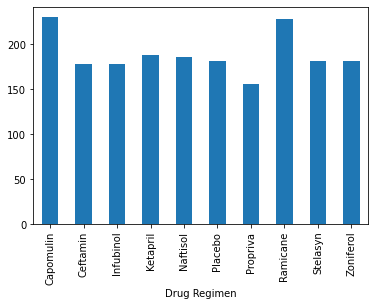

In [185]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_pandas = drop_duplicates_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
bar_pandas
bar_plot= bar_pandas.plot(kind="bar")



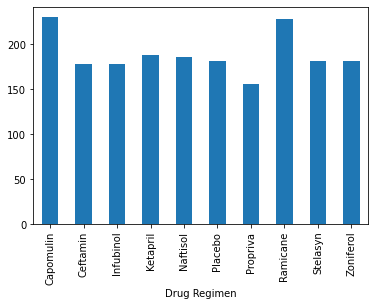

In [186]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_plt = drop_duplicates_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]


#x_axis = np.arange(len(bar_plt))
tick_locations = [value for value in x_axis]
plt._bar = bar_plt.plot.bar(legend = False)
#plt.xticks(tick_locations, bar_plt, rotation = "vertical")

plt.show ()

<AxesSubplot:ylabel='Mouse ID'>

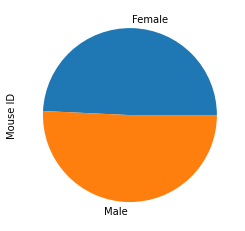

In [187]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_pandas= drop_duplicates_df.groupby("Sex").count()["Mouse ID"]
gender_pandas

gender_pie_chart = gender_pandas.plot(kind = "pie")
gender_pie_chart

<function matplotlib.pyplot.show(close=None, block=None)>

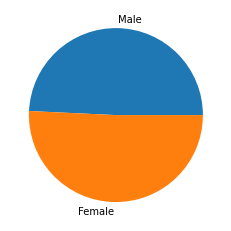

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot= drop_duplicates_df.groupby("Sex").count()["Mouse ID"]
gender_pyplot

labels = "Male", "Female"

plt.pie(gender_pyplot, labels = labels)
plt.show

## Quartiles, Outliers and Boxplots

In [212]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tp_df = pd.DataFrame(drop_duplicates_df.groupby('Drug Regimen')['Timepoint'].max().sort_values(ascending = False)).reset_index().rename(columns={'Timepoint': 'Last_timepoint'})
max_tp_df
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mice_df = pd.merge(drop_duplicates_df, max_tp_df, on= "Drug Regimen")
merge_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [213]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

drug_numbers = []


for drug in drugs:
    drug_df = merge_mice_df.loc[merge_mice_df["Drug Regimen"] == drug]
    final_tumor_volume = drug_df.loc[drug_df["Timepoint"] == drug_df["Last_timepoint"]]
    
 # Locate the rows which contain mice on each drug and get the tumor volumes
    numbers= final_tumor_volume["Tumor Volume (mm3)"]
    drug_numbers.append(numbers)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = numbers.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
# Determine outliers using upper and lower bounds    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers_count = (numbers.loc[(final_tumor_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_tumor_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'{drugs}{outliers_count}')
    
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']0
IQR for Ramicane: 7.527130082499998
Lower Bound for Ramicane: 19.690480101250003
Upper Bound for Ramicane: 49.79900043124999
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']0
IQR for Infubinol: 4.9311172099999965
Lower Bound for Infubinol: 55.35777559500001
Upper Bound for Infubinol: 75.08224443499999
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']0
IQR for Ceftamin: 6.093590140000003
Lower Bound for Ceftamin: 52.29350701999999
Upper Bound for Ceftamin: 76.66786758
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']0


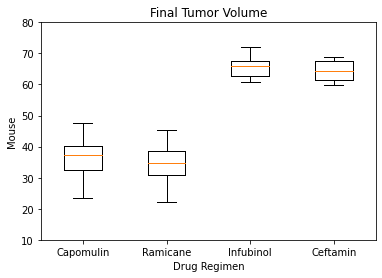

(None,)

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
box_plot = dict(marker= "o", markerfacecolor= "g", markersize= 8, markeredgecolor = 'black')
plt.boxplot(drug_numbers, flierprops = box_plot)
ax1.set_title("Final Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Mouse")
ax1.boxplot(drug_numbers)
ax1.set_ylim(10,80)

plt.xticks([1,2,3,4],  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation = "horizontal"),
plt.show(),

## Line and Scatter Plots

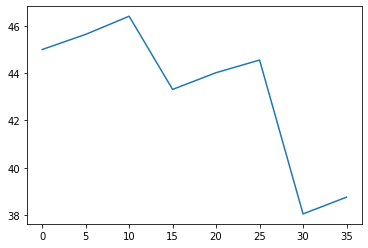

In [246]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse = drop_duplicates_df.loc[drop_duplicates_df["Mouse ID"]== "j246"]
one_mouse

plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"])
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
